
==============Convex Hull untuk Visualisasi Tes Linier Separability Dataset==============

Silahkan pilih dataset yang akan digunakan

1. iris
2. wine
3. digits

Masukkan pilihan : 


Daftar pilihan feature
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Silahkan pilih sumbu x : 

Daftar pilihan feature
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Silahkan pilih sumbu y : 


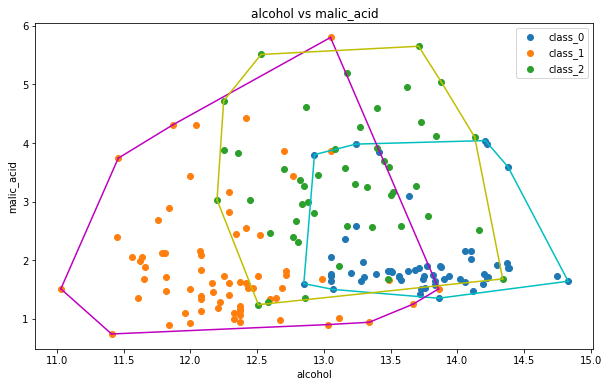

In [1]:
import numpy  
import math
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 


def distance(A, B, C): 
    #mencari jarak titik C dengan garis AB
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C
    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2
    dist = (abs(a*x3 + b*y3 + c))/math.sqrt(a**2 + b**2)
    return dist

def det3(A, B, C): 
    #mencari determinan dari 3 titik
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C
    det = x1*y2 + x3*y1 + x2*y3 - x3*y2 - x2*y1 - x1*y3
    return det

def myConvexHull(bucket):
    #inisialisasi
    kananAB = []    #himpunan titik di sebelah kanan garis AB
    kiriAB = []     #himpunan titik di sebelah kiri garis AB
    
    #mengosongkan hasil terlebih dahulu
    hasil.clear()

    #sort
    bucket = sorted(bucket, key=lambda k: (k[0], k[1]))
    
    #ubah tipe ke list
    for i in range(len(bucket)):
        bucket[i] = bucket[i].tolist()

    #ambil titik min dan maks
    P1 = bucket[0]
    P2 = bucket[len(bucket)-1]

    #tentukan semua titik apakah masuk ke sebelah
    #kanan atau kiri dari garis yang terbentuk
    for point in bucket:
        det = det3(P1, P2, point)
        if (det > 0):
            kiriAB.append(point)
        elif (det < 0):
            kananAB.append(point)
    
    #masukkan solusi
    hasil.append((P1,P2))
    hasil.append((P2,P1))
    
    #cari di kedua bagian
    myFindHull(kananAB, P1, P2)
    myFindHull(kiriAB, P2, P1)

    return hasil

def myFindHull(Set, P1, P2):
    if len(Set) == 0:
        #ketika Set kosong, tidak akan diproses
        return
    else :
        #inisialisasi
        Selected = []       #menyimpan titik terjauh
        tempdistance = -1   #menyimpan jarak sementara
        maxdistance = -1    #menyimpan jarak terjauh

        #cari point terjauh
        for point in Set:                               
            tempdistance = distance(P1, P2, point)
            if tempdistance > maxdistance:
                maxdistance = tempdistance
                Selected = point

        #ganti solusinya
        hasil.remove((P1, P2))
        hasil.append((P1, Selected))
        hasil.append((Selected, P2))
        
        #hapus selected dari Set
        Set.remove(Selected)

        #buat partisi baru
        Setbaru1 = []
        Setbaru2 = []
        for point in Set:
            det1 = det3(P1, Selected, point)
            det2 = det3(Selected, P2, point)
            if det1 < 0:
                Setbaru1.append(point)
            if det2 < 0:
                Setbaru2.append(point)
        
        #rekurens
        myFindHull(Setbaru1, P1, Selected)
        myFindHull(Setbaru2, Selected, P2)




print()
print("==============Convex Hull untuk Visualisasi Tes Linier Separability Dataset==============")
print()


# inisialisasi
hasil = []  #menyimpan hasil dari convex hull
colors = [ 'c', 'm', 'y','r', 'g', 'b', 'k']

print("Silahkan pilih dataset yang akan digunakan")
print()
print("1. iris")
print("2. wine")
print("3. digits")
print()
print("Masukkan pilihan : ")
a = int(input())

if (a == 1):
    data = datasets.load_iris()
    #create a DataFrame 
    df = pd.DataFrame(data.data, columns=data.feature_names) 
    df['Target'] = pd.DataFrame(data.target) 
elif (a == 2):
    data = datasets.load_wine()
    #create a DataFrame 
    df = pd.DataFrame(data.data, columns=data.feature_names) 
    df['Target'] = pd.DataFrame(data.target)
elif (a == 3):
    data = datasets.load_digits()
    #create a DataFrame 
    df = pd.DataFrame(data.data, columns=data.feature_names) 
    df['Target'] = pd.DataFrame(data.target)
else:
    print("input salah!")

if (a != 0):
    #sumbu x
    print()
    print()
    print("Daftar pilihan feature")
    for i in range(len(data.feature_names)):
        print(str(i+1) + ". " + data.feature_names[i])
    print()
    print("Silahkan pilih sumbu x : ")
    idx1 = int(input())
    while (idx1 < 1 or idx1 >len(data.feature_names)):
        print("input salah!")
        print()
        print("Silahkan pilih sumbu x : ")
        idx1 = int(input())

    #sumbu y
    print()
    print("Daftar pilihan feature")
    for i in range(len(data.feature_names)):
        print(str(i+1) + ". " + data.feature_names[i])
    print()
    print("Silahkan pilih sumbu y : ")
    idx2 = int(input())
    while (idx2 < 1 or idx2 >len(data.feature_names)):
        print("input salah!")
        print()
        print("Silahkan pilih sumbu y : ")
        idx2 = int(input())

    #visualisasi
    plt.figure(figsize = (10, 6))
    plt.title(data.feature_names[idx1-1] + " vs " + data.feature_names[idx2-1])
    plt.xlabel(data.feature_names[idx1-1])
    plt.ylabel(data.feature_names[idx2-1])
    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i]
        bucket = bucket.iloc[:,[idx1-1,idx2-1]].values
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
        hull = myConvexHull(bucket)
        for j in range(len(hull)):
            x = [hull[j][0][0], hull[j][1][0]]
            y = [hull[j][0][1], hull[j][1][1]]
            plt.plot(x,y, colors[i%7])
    plt.legend()
    plt.plot()
        

        
